In [26]:
from casatools import simulator, image, table, coordsys, measures, componentlist, quanta, ctsys
from casatasks import tclean, ft, imhead, listobs, exportfits, flagdata, bandpass, applycal
from casatasks.private import simutil
from cngi.conversion import convert_ms, convert_image

import os
import pylab as pl
import numpy as np
#from astropy.io import fits
#from astropy.wcs import WCS

from casatools import simulator
from casatasks import tclean

In [27]:
sm = simulator()
ia = image()
tb = table()
cs = coordsys()
me = measures()
qa = quanta()
cl = componentlist()
mysu = simutil.simutil()

In [28]:
dovp = True
#gridder = 'standard'
gridder = 'mosaic'
#ms_name = 'zenith_point_source_sim_dovp_' + str(dovp) + '.ms'
#im_name = 'zenith_point_source_sim_img/point_source_sim_dovp_' + str(dovp) + '_gridder_' + gridder

ms_name = 'point_source_sim_vis/mosaic_pleiades_sim_dovp_' + str(dovp) + '.ms'
im_name = 'point_source_sim_img/mosaic_pleiades_sim_dovp_' + str(dovp) + '_gridder_' + gridder

#conf_file = 'tel_config/vla_small.d.cfg' #Small array with 3 antennae
conf_file = 'tel_config/vla.d.cfg'

In [29]:
time_interval01 = ['-5.0h','-4.0h']
time_interval02 = ['-4.0h','-3.0h']
time_interval03 = ['-3.0h','-2.0h']
time_interval04 = ['-2.0h','-1.0h']
time_interval05 = ['-1.0h','0.0h']
time_interval11 = ['0.0h','1.0h']
time_interval12 = ['1.0h','2.0h']
time_interval13 = ['2.0h','3.0h']
time_interval14 = ['3.0h','4.0h']
time_interval15 = ['4.0h','5.0h']
time_interval21 = ['19.0h','20.0h']
time_interval22 = ['20.0h','21.0h']
time_interval23 = ['21.0h','22.0h']
time_interval24 = ['22.0h','23.0h']
time_interval25 = ['23.0h','24.0h']
time_interval31 = ['24.0h','25.0h']
time_interval32 = ['25.0h','26.0h']
time_interval33 = ['26.0h','27.0h']
time_interval34 = ['27.0h','28.0h']
time_interval35 = ['28.0h','29.0h']
time_interval41 = ['43.0h','44.0h']
time_interval42 = ['44.0h','45.0h']
time_interval43 = ['45.0h','46.0h']
time_interval44 = ['46.0h','47.0h']
time_interval45 = ['47.0h','48.0h']
time_interval51 = ['48.0h','49.0h']
time_interval52 = ['49.0h','50.0h']
time_interval53 = ['50.0h','51.0h']
time_interval54 = ['51.0h','52.0h']
time_interval55 = ['52.0h','53.0h']
time_interval61 = ['67.0h','68.0h']
time_interval62 = ['68.0h','69.0h']
time_interval63 = ['69.0h','70.0h']
time_interval64 = ['70.0h','71.0h']
time_interval65 = ['71.0h','72.0h']
integration_time = '360.0s'

In [30]:
os.system('rm -rf ' + ms_name)

0

In [31]:
sm.open(ms=ms_name);

In [32]:
q = mysu.readantenna(conf_file)

In [33]:
#CASA5
#(x,y,z,d,an,an2,telname, obspos) = mysu.readantenna(conf_file)

#CASA6
(x,y,z,d,an,an2,telname, obspos) = mysu.readantenna(conf_file)

In [34]:
## Set the antenna configuration
sm.setconfig(telescopename=telname,
                        x=x,
                        y=y,
                        z=z,
                        dishdiameter=d,
                        mount=['alt-az'],
                        antname=an,
                        coordsystem='local',
                        referencelocation=me.observatory(telname));

In [35]:
## Set the polarization mode (this goes to the FEED subtable)
sm.setfeed(mode='perfect R L', pol=['']);

In [36]:
'''
sm.setspwindow(spwname="SBand",
               freq='3.0GHz',
               deltafreq='0.4GHz',
               freqresolution='0.01GHz',
               nchannels=3,
               refcode='LSRK',
               stokes='RR RL LR LL');
'''

sm.setspwindow(spwname="SBand",
               freq='3.0GHz',
               deltafreq='0.4GHz',
               freqresolution='0.01GHz',
               nchannels=3,
               refcode='LSRK',
               stokes='RR LL');

In [37]:
sm.setfield( sourcename="atlas",sourcedirection=me.direction(rf='J2000', v0='03h50m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="alcyone",sourcedirection=me.direction(rf='J2000', v0='03h50m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="merope",sourcedirection=me.direction(rf='J2000', v0='03h50m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="maia",sourcedirection=me.direction(rf='J2000', v0='03h50m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="electra",sourcedirection=me.direction(rf='J2000', v0='03h50m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="2atlas",sourcedirection=me.direction(rf='J2000', v0='03h49m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="2alcyone",sourcedirection=me.direction(rf='J2000', v0='03h49m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="2merope",sourcedirection=me.direction(rf='J2000', v0='03h49m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="2maia",sourcedirection=me.direction(rf='J2000', v0='03h49m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="2electra",sourcedirection=me.direction(rf='J2000', v0='03h49m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="3atlas",sourcedirection=me.direction(rf='J2000', v0='03h48m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="3alcyone",sourcedirection=me.direction(rf='J2000', v0='03h48m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="3merope",sourcedirection=me.direction(rf='J2000', v0='03h48m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="3maia",sourcedirection=me.direction(rf='J2000', v0='03h48m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="3electra",sourcedirection=me.direction(rf='J2000', v0='03h48m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="4atlas",sourcedirection=me.direction(rf='J2000', v0='03h47m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="4alcyone",sourcedirection=me.direction(rf='J2000', v0='03h47m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="4merope",sourcedirection=me.direction(rf='J2000', v0='03h47m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="4maia",sourcedirection=me.direction(rf='J2000', v0='03h47m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="4electra",sourcedirection=me.direction(rf='J2000', v0='03h47m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="5atlas",sourcedirection=me.direction(rf='J2000', v0='03h46m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="5alcyone",sourcedirection=me.direction(rf='J2000', v0='03h46m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="5merope",sourcedirection=me.direction(rf='J2000', v0='03h46m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="5maia",sourcedirection=me.direction(rf='J2000', v0='03h46m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="5electra",sourcedirection=me.direction(rf='J2000', v0='03h46m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="6atlas",sourcedirection=me.direction(rf='J2000', v0='03h45m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="6alcyone",sourcedirection=me.direction(rf='J2000', v0='03h45m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="6merope",sourcedirection=me.direction(rf='J2000', v0='03h45m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="6maia",sourcedirection=me.direction(rf='J2000', v0='03h45m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="6electra",sourcedirection=me.direction(rf='J2000', v0='03h45m00.0s',v1='+23d55m00.0s'))

sm.setfield( sourcename="1atlas",sourcedirection=me.direction(rf='J2000', v0='03h44m00.0s',v1='+24d35m00.0s'))
sm.setfield( sourcename="1alcyone",sourcedirection=me.direction(rf='J2000', v0='03h44m00.0s',v1='+24d25m00.0s'))
sm.setfield( sourcename="1merope",sourcedirection=me.direction(rf='J2000', v0='03h44m00.0s',v1='+24d15m00.0s'))
sm.setfield( sourcename="1maia",sourcedirection=me.direction(rf='J2000', v0='03h44m00.0s',v1='+24d05m00.0s'))
sm.setfield( sourcename="1electra",sourcedirection=me.direction(rf='J2000', v0='03h44m00.0s',v1='+23d55m00.0s'))



#sm.setfield( sourcename="fake",sourcedirection=me.direction(rf='J2000', v0='0h0m0.0s',v1='+90d00m0.0s')) #Zenith

True

In [38]:
## Leave autocorrelations out of the MS.
sm.setauto(autocorrwt=0.0)

True

In [39]:
sm.settimes(integrationtime=integration_time,
                 usehourangle=True,
                 referencetime=me.epoch('UTC','2019/10/4/00:00:00'));

In [40]:
sm.observe(sourcename="atlas",
        spwname='SBand',
        starttime=time_interval01[0],
        stoptime=time_interval01[1]);
sm.observe(sourcename="electra",
        spwname='SBand',
        starttime=time_interval02[0],
        stoptime=time_interval02[1]);
sm.observe(sourcename="alcyone",
        spwname='SBand',
        starttime=time_interval03[0],
        stoptime=time_interval03[1]);
sm.observe(sourcename="merope",
        spwname='SBand',
        starttime=time_interval04[0],
        stoptime=time_interval04[1]);
sm.observe(sourcename="maia",
        spwname='SBand',
        starttime=time_interval05[0],
        stoptime=time_interval05[1]);
sm.observe(sourcename="1atlas",
        spwname='SBand',
        starttime=time_interval11[0],
        stoptime=time_interval11[1]);
sm.observe(sourcename="1electra",
        spwname='SBand',
        starttime=time_interval12[0],
        stoptime=time_interval12[1]);
sm.observe(sourcename="1alcyone",
        spwname='SBand',
        starttime=time_interval13[0],
        stoptime=time_interval13[1]);
sm.observe(sourcename="1merope",
        spwname='SBand',
        starttime=time_interval14[0],
        stoptime=time_interval14[1]);
sm.observe(sourcename="1maia",
        spwname='SBand',
        starttime=time_interval15[0],
        stoptime=time_interval15[1]);
sm.observe(sourcename="2atlas",
        spwname='SBand',
        starttime=time_interval21[0],
        stoptime=time_interval21[1]);
sm.observe(sourcename="2electra",
        spwname='SBand',
        starttime=time_interval22[0],
        stoptime=time_interval22[1]);
sm.observe(sourcename="2alcyone",
        spwname='SBand',
        starttime=time_interval23[0],
        stoptime=time_interval23[1]);
sm.observe(sourcename="2merope",
        spwname='SBand',
        starttime=time_interval24[0],
        stoptime=time_interval24[1]);
sm.observe(sourcename="2maia",
        spwname='SBand',
        starttime=time_interval25[0],
        stoptime=time_interval25[1]);
sm.observe(sourcename="6atlas",
        spwname='SBand',
        starttime=time_interval31[0],
        stoptime=time_interval31[1]);
sm.observe(sourcename="6electra",
        spwname='SBand',
        starttime=time_interval32[0],
        stoptime=time_interval32[1]);
sm.observe(sourcename="6alcyone",
        spwname='SBand',
        starttime=time_interval33[0],
        stoptime=time_interval33[1]);
sm.observe(sourcename="6merope",
        spwname='SBand',
        starttime=time_interval34[0],
        stoptime=time_interval34[1]);
sm.observe(sourcename="6maia",
        spwname='SBand',
        starttime=time_interval35[0],
        stoptime=time_interval35[1]);
sm.observe(sourcename="3atlas",
        spwname='SBand',
        starttime=time_interval41[0],
        stoptime=time_interval41[1]);
sm.observe(sourcename="3electra",
        spwname='SBand',
        starttime=time_interval42[0],
        stoptime=time_interval42[1]);
sm.observe(sourcename="3alcyone",
        spwname='SBand',
        starttime=time_interval43[0],
        stoptime=time_interval43[1]);
sm.observe(sourcename="3merope",
        spwname='SBand',
        starttime=time_interval44[0],
        stoptime=time_interval44[1]);
sm.observe(sourcename="3maia",
        spwname='SBand',
        starttime=time_interval45[0],
        stoptime=time_interval45[1]);
sm.observe(sourcename="4atlas",
        spwname='SBand',
        starttime=time_interval51[0],
        stoptime=time_interval51[1]);
sm.observe(sourcename="4electra",
        spwname='SBand',
        starttime=time_interval52[0],
        stoptime=time_interval52[1]);
sm.observe(sourcename="4alcyone",
        spwname='SBand',
        starttime=time_interval53[0],
        stoptime=time_interval53[1]);
sm.observe(sourcename="4merope",
        spwname='SBand',
        starttime=time_interval54[0],
        stoptime=time_interval54[1]);
sm.observe(sourcename="4maia",
        spwname='SBand',
        starttime=time_interval55[0],
        stoptime=time_interval55[1]);
sm.observe(sourcename="5atlas",
        spwname='SBand',
        starttime=time_interval61[0],
        stoptime=time_interval61[1]);
sm.observe(sourcename="5electra",
        spwname='SBand',
        starttime=time_interval62[0],
        stoptime=time_interval62[1]);
sm.observe(sourcename="5alcyone",
        spwname='SBand',
        starttime=time_interval63[0],
        stoptime=time_interval63[1]);
sm.observe(sourcename="5merope",
        spwname='SBand',
        starttime=time_interval64[0],
        stoptime=time_interval64[1]);
sm.observe(sourcename="5maia",
        spwname='SBand',
        starttime=time_interval65[0],
        stoptime=time_interval65[1]);

In [41]:
## Close the simulator
sm.close()

True

In [42]:
clname=ms_name.split('.')[0] + '.cl'
os.system('rm -rf '+ clname)

0

In [43]:
# Add sources, one at a time.
# Call multiple times to add multiple sources. ( Change the 'dir', obviously )
#    cl.addcomponent(dir='J2000 19h59m28.5s +40d44m01.5s',
#                        flux=5.42,            # For a gaussian, this is the integrated area.
#                        fluxunit='Jy',
#                        freq='LSRK 3.0GHz',
#                        shape='point',       ## Point source
#    #                    shape='gaussian',   ## Gaussian
#    #                    majoraxis="5.0arcmin",
#    #                    minoraxis='2.0arcmin',
#                        spectrumtype="constant",
#                        index=-1.0)
#Sim
cl.addcomponent(dir='J2000 03h47m29.1s +24d06m18.5s',
                    flux=3,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h49m09.7s +24d03m12.3s',
                    flux=3,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)
cl.addcomponent(dir='J2000 03h46m19.6s +23d56m54.1s',
                    flux=3,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)
cl.addcomponent(dir='J2000 03h45m49.6s +24d22m03.9s',
                    flux=3,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)
cl.addcomponent(dir='J2000 03h44m52.5s +24d06m48.0s',
                    flux=3,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)



cl.addcomponent(dir='J2000 03h45m12.5s +24d28m02.2s',
                    flux=2.17,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h49m11.2s +24d08m12.2s',
                    flux=2.17,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h44m48.2s +24d17m22.1s',
                    flux=2.17,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h45m54.5s +24d33m16.2s',
                    flux=2.17,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h46m02.9s +24d31m40.4s',
                    flux=1,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h47m29.0s +24d17m22.2s',
                    flux=1,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)

cl.addcomponent(dir='J2000 03h47m59.0s +24d29m20.0s',
                    flux=1,            # For a gaussian, this is the integrated area.
                    fluxunit='Jy',
                    freq='LSRK 3.0GHz',
                    shape='point',       ## Point source
#                    shape='gaussian',   ## Gaussian
#                    majoraxis="5.0arcmin",
#                    minoraxis='2.0arcmin',
                    spectrumtype="constant",
                    index=-1.0)
#    #Zenith
#    cl.addcomponent(dir='J2000 19h59m0.0s +89d54m01.5s',
#                        flux=2.17,            # For a gaussian, this is the integrated area.
#                        fluxunit='Jy',
#                        freq='LSRK 3.0GHz',
#                        shape='point',       ## Point source
#    #                    shape='gaussian',   ## Gaussian
#    #                    majoraxis="5.0arcmin",
#    #                    minoraxis='2.0arcmin',
#                        spectrumtype="constant",
#                        index=-1.0)


#    cl.addcomponent(dir='J2000 19h59m0.0s +40d51m01.5s',
#                        flux=3.145,            # For a gaussian, this is the integrated area.
#                        fluxunit='Jy',
#                        freq='LSRK 3.0GHz',
#                        shape='point',       ## Point source
#    #                    shape='gaussian',   ## Gaussian
#    #                    majoraxis="5.0arcmin",
#    #                    minoraxis='2.0arcmin',
#                        spectrumtype="constant",
#                        index=-1.0)

#    cl.addcomponent(dir='J2000 19h59m55.5s +40d27m01.5s',
#                        flux=7.56,            # For a gaussian, this is the integrated area.
#                        fluxunit='Jy',
#                        freq='LSRK 3.0GHz',
#                        shape='point',       ## Point source
#    #                    shape='gaussian',   ## Gaussian
#    #                    majoraxis="5.0arcmin",
#    #                    minoraxis='2.0arcmin',
#                        spectrumtype="constant",
#                        index=-1.0)

cl.rename(filename=clname)
cl.done()

True

In [44]:
#sm.setlimits(shadowlimit=100, elevationlimit='-180.0deg')
   

sm.openfromms(ms_name)

True

In [45]:
if dovp == False:
    sm.setvp(dovp=dovp)
else:
    sm.setvp(dovp=dovp,usedefaultvp=True,dosquint=False)

In [46]:
sm.predict(complist = clname ,incremental=False)

sm.close()

True

In [47]:
flagdata(vis=ms_name,mode='unflag')

{}

In [52]:
os.system('rm -rf '+ im_name + '.*')

0

In [58]:
#tclean(vis=ms_name,imagename=im_name,imsize=[400,200],cell=[20.0,20.0],specmode='cube',niter=0,pblimit=0.0,gridder=gridder,stokes='RR', phasecenter="J2000 20h00m28.5 40d44m01.5")
tclean(vis=ms_name,imagename=im_name+"cniter500",imsize=[1600,800],cell=[5.0,5.0],specmode='cube',niter=40000, cycleniter=500, pblimit=0.2,gridder=gridder,stokes='RR',phasecenter='J2000 03h47m29.1s +24d12m18.5s')

{}

In [59]:
convert_ms(ms_name)
#convert_image(im_name)

Completed ddi 0  process time 7.17 semaining time est 0 s                           
Completed subtables  process time 4.08 s...                                     
                                                  


<xarray.Dataset>
Dimensions:           (antenna_ids: 27, feed_ids: 27, field_ids: 35, observation_ids: 1, polarization_ids: 1, source_ids: 35, spw_ids: 1, state_ids: 1)
Coordinates:
  * antenna_ids       (antenna_ids) int64 0 1 2 3 4 5 6 ... 20 21 22 23 24 25 26
    antennas          (antenna_ids) <U16 'W01' 'W02' 'W03' ... 'N07' 'N08' 'N09'
  * field_ids         (field_ids) int64 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34
    fields            (field_ids) <U8 'atlas' 'alcyone' ... '1maia' '1electra'
  * feed_ids          (feed_ids) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
  * observation_ids   (observation_ids) int64 0
    observations      (observation_ids) <U16 'CASA simulation'
  * polarization_ids  (polarization_ids) int64 0
  * source_ids        (source_ids) int64 0 1 2 3 4 5 6 ... 28 29 30 31 32 33 34
    sources           (source_ids) <U8 'atlas' 'alcyone' ... '1maia' '1electra'
  * spw_ids           (spw_ids) int64 0
  * state_ids         (state_ids) int64 0
Data variables:
    *empty*
Attributes:
    xds0:             <xarray.Dataset>\nDimensions:                (baseline:...
    ANTENNA:          <xarray.Dataset>\nDimensions:        (antenna_id: 27, d...
    FEED:             <xarray.Dataset>\nDimensions:             (d0: 27, d1: ...
    FIELD:            <xarray.Dataset>\nDimensions:        (d1: 1, d2: 2, fie...
    OBSERVATION:      <xarray.Dataset>\nDimensions:         (d1: 2, observati...
    POINTING:         <xarray.Dataset>\nDimensions:      (antenna_id: 27, d2:...
    POLARIZATION:     <xarray.Dataset>\nDimensions:       (d0: 1, d1: 2, d2: ...
    SOURCE:           <xarray.Dataset>\nDimensions:             (d0: 35, d1: ...
    SPECTRAL_WINDOW:  <xarray.Dataset>\nDimensions:             (d1: 3, spect...
    STATE:            <xarray.Dataset>\nDimensions:   (state_id: 1)\nCoordina...

In [61]:
ia = image()

In [63]:
ia.open(im_name+"cniter500.image")

True

In [66]:
ia.getchunk()

array([[[[-2.81783796e-09,  3.31786221e-09, -6.95521463e-09]],

        [[-1.05351827e-09,  1.17738719e-09, -1.09737579e-08]],

        [[-3.38434480e-09,  6.86583290e-10, -7.78126275e-09]],

        ...,

        [[-5.06258191e-09, -2.05320760e-09, -9.32821390e-11]],

        [[-7.68052821e-09, -3.38566508e-10, -4.77657525e-10]],

        [[-4.07301570e-09,  2.23208318e-09, -1.87733229e-09]]],


       [[[-3.17739901e-09,  2.94146019e-09, -7.72588837e-09]],

        [[-1.12594334e-09,  8.51572146e-10, -1.02333155e-08]],

        [[-3.20144289e-09,  5.17784593e-10, -5.94604588e-09]],

        ...,

        [[-5.15732390e-09, -3.40987749e-09,  6.93436752e-10]],

        [[-7.76687159e-09, -1.43879131e-09, -5.09688125e-10]],

        [[-4.12400425e-09,  2.09022266e-09, -2.95073188e-09]]],


       [[[-3.05855274e-09,  2.18271401e-09, -7.45994910e-09]],

        [[-1.20547017e-09,  6.23743446e-10, -8.80818085e-09]],

        [[-2.80752621e-09,  4.62972827e-10, -4.27272573e-09]],

        

In [68]:
data = ia.getchunk()

In [78]:
chan = 1
ngcasa_image_name = 'IMAGE'
pb_limit = 0.2
#extent = extent=(np.min(casa_img_xds.m),np.max(casa_img_xds.m),np.min(casa_img_xds.l),np.max(casa_img_xds.l))

mosaic_pb = img_xds.PB.isel(chan=chan)
mosaic_img = img_xds[ngcasa_image_name].isel(chan=chan)
mosaic_img = mosaic_img.where(mosaic_pb > np.max(mosaic_pb)*pb_limit,other=np.nan)

NameError: name 'img_xds' is not defined

(-0.5, 799.5, 1599.5, -0.5)

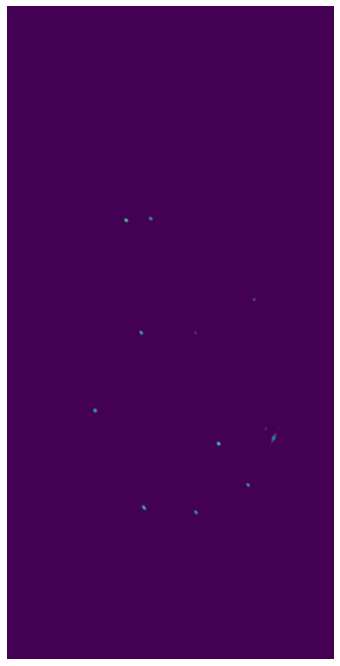

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
#plt.imshow(img_xds.IMAGE.isel(chan=chan,time=0,pol=0))
plt.imshow(data[:, :, 0, 0], vmin = 0.2)
plt.axis("off")